<a href="https://colab.research.google.com/github/iranamuneeb/Neural-Networks/blob/main/Neural_Network_Regression_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical bariable based on some other combination of variables, even shorter, predicting a number.

## What are Regression Type Problems:
 * How much will this house sell for ?
 * How Many many people will buy this app?
 * How much will my health insurance be?
 * How much should I save each week for feul?



>  " We are basically Predicting a number of some sort"



***Covering following topics in this notebook:***

1 - Architecture of a neural network regression model.

2 - input shapes and output shapes of a regression model (features and labels)

3 - Creating custom data to view and fit

4 - steps in modelling

 * Creating a model, compiling a model, fitting a model, evaluating a model

5 - Different evaluation methods

6 - Saving and loading models

In [1]:
# importing tensorflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Creating Data to view and fit

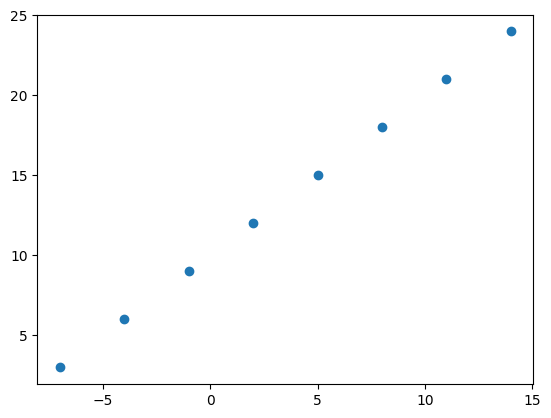

In [2]:
# creating features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# creating labels

y = np.array( [3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualising the data

plt.scatter(X, y)

### Input and Output Shapes

In [3]:
# creating a demo tensor for our housing price prediction

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
# Turning our numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning mmode.
2. **Compiling a model** - define the loss function (in another words, the function which tells out model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [15]:
# Set random seed

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stohasitic gradient descent
              metrics = ["mae"]

              )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/20
1/1 [==============================] - 0s 402ms/step - loss: 8.7943 - mae: 8.7943
Epoch 2/20
1/1 [==============================] - 0s 14ms/step - loss: 8.6618 - mae: 8.6618
Epoch 3/20
1/1 [==============================] - 0s 18ms/step - loss: 8.5293 - mae: 8.5293
Epoch 4/20
1/1 [==============================] - 0s 15ms/step - loss: 8.3968 - mae: 8.3968
Epoch 5/20
1/1 [==============================] - 0s 23ms/step - loss: 8.2643 - mae: 8.2643
Epoch 6/20
1/1 [==============================] - 0s 20ms/step - loss: 8.1318 - mae: 8.1318
Epoch 7/20
1/1 [==============================] - 0s 22ms/step - loss: 7.9993 - mae: 7.9993
Epoch 8/20
1/1 [==============================] - 0s 15ms/step - loss: 7.8668 - mae: 7.8668
Epoch 9/20
1/1 [==============================] - 0s 14ms/step - loss: 7.7343 - mae: 7.7343
Epoch 10/20
1/1 [==============================] - 0s 24ms/step - loss: 7.6018 - mae: 7.6018
Epoch 11/20
1/1 [==============================] - 0s 17ms/step - loss: 7.4693

In [16]:
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[29.57868]], dtype=float32)

## Improving our model

we can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we migh add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** ( leave it training for longer) or on more data (give the model more examples to learn from)

In [21]:
# creating model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compiling the model

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(l4=0.00001),
              metrics = ["mae"])

# fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 552ms/step - loss: 12.4568 - mae: 12.4568
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 12.3243 - mae: 12.3243
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1918 - mae: 12.1918
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 12.0593 - mae: 12.0593
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.9268 - mae: 11.9268
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 11.7943 - mae: 11.7943
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 11.6618 - mae: 11.6618
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 11.5293 - mae: 11.5293
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 11.3968 - mae: 11.3968
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2643 - mae: 11.2643
Epoch 11/100
1/1 [==============================

In [23]:
model.predict([17.0])

1/1 [==============================] - 0s 111ms/step


array([[29.71673]], dtype=float32)

In [51]:
# creating model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    #tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compiling the model

model.compile(loss = "mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 582ms/step - loss: 13.0850 - mae: 13.0850
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3257 - mae: 12.3257
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5607 - mae: 11.5607
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7884 - mae: 10.7884
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0073 - mae: 10.0073
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2163 - mae: 9.2163
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.4139 - mae: 8.4139
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5979 - mae: 7.5979
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8356 - mae: 6.8356
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8463 - mae: 6.8463
Epoch 11/100
1/1 [==============================] - 0s 10m

In [52]:
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[27.812897]], dtype=float32)

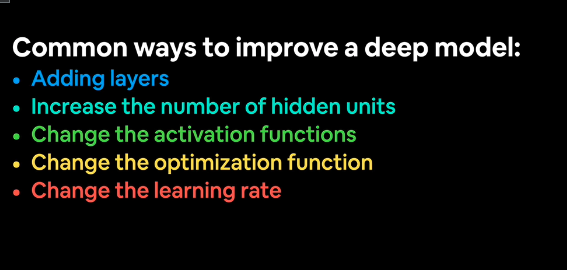

## Evaluating a model

In practice, a typical workflow you'll go through when building neural is:

```
build a model -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> evaluate it....

```

when it comes to evaluation there are three words,

> visualize, visualize, visualize

it's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* what does our model look like?
* The training of the mode - How does model perform while it learns
* the prediction of the model - how does it fair against the ground truth.

In [53]:
# making a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [55]:
# make labels for the datasets

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

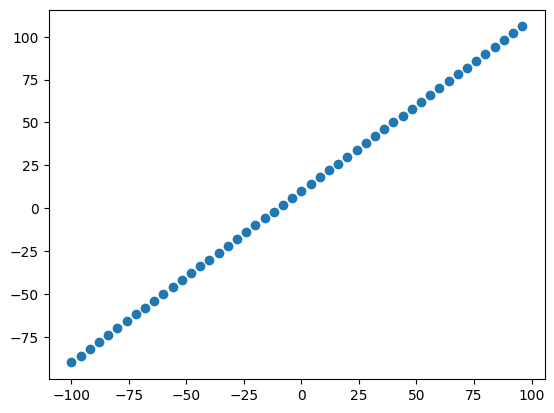

In [56]:
plt.scatter(X,y)

### The three sets

* Training set -  The model learns from this data, which is typically 70-80% of thhe total data you have available.

* validation set - the model gets tuned on this data, which is typically 10-15% of the data available.

* test set - the model gets evaluated on this dataset to test what is has learned, this set is typically 10-15% of the total data available

In [58]:
# check the length of data we have

len(X)

50

In [59]:
X_train = X[:40] #selecting first 40 80%
y_train = y[:40]


X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualising the data

Now we've got our data in training and test sets.. let's visualize it.

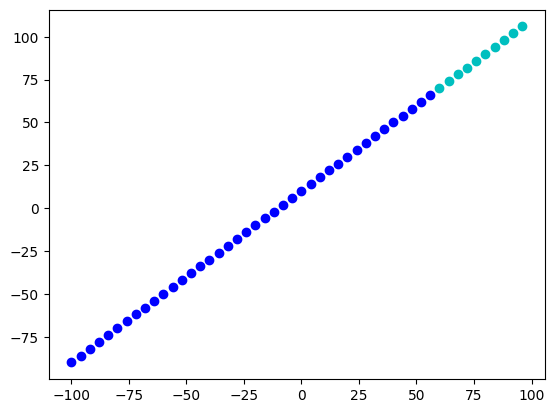

In [62]:
plt.scatter(X_train, y_train, c='b', label="training data")
plt.scatter(X_test, y_test, c='c', label="testing data")
plt.legend;

In [64]:
# creating a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(X_train, y_train, epochs=100)

In [67]:
# Let's create a model which builds automatically by defining the input shape argument

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary(
)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).